In [1]:
from torch.utils.tensorboard import SummaryWriter
import torch 
import impaintingLib as imp
from torchvision import transforms
from PIL import Image
import PIL

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

seed = 0
resize = 3
shuffle = seed == 0
if not shuffle :
    torch.manual_seed(seed)
    
plot = imp.utils.Visu(gridSize=8).plot_img
trainloader, testloader = imp.data.getFaces(shuffle=shuffle,resize=resize)
imgs, _ = next(iter(testloader))
imgs = imgs.to(device)
n,c,w,h = imgs.shape

classif = imp.loss.getTrainedModel()

models = []
models.append(imp.model.UNet(3, netType="partial", convType="gated").to(device))
models.append(imp.model.SubPixelNetwork(3).to(device))
basepath = "./modelSave/gated_conv_UNet(partial_gated)-PixelShuffle1_L1_+_500*perceptualAE_+_perceptualVGG_+_totalvar/"
models[0].load_state_dict(torch.load(basepath + 'UNet(partial gated).pth'))
models[1].load_state_dict(torch.load(basepath + 'PixelShuffle1.pth'))

<All keys matched successfully>

In [5]:
# Original
imgs = imgs[:8]
#plot(imgs)

# Classified
imgT = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(imgs)
classified = classif(imgT)
classified = imp.loss.generate_label(classified,w).to(device)
#plot(classified)

# Altered
alter = imp.mask.Alter(resize=resize,seed=seed).irregularMask
altered = imp.data.normalize(imgs)
altered = alter(altered).to(device)
alteredDisplay = imp.data.inv_normalize(altered)
#plot(alteredDisplay)

# Predicted
predicted = altered
for model in models :
    predicted = model(predicted)
predicted = imp.data.inv_normalize(predicted)
#plot(predicted)

# Classified 2
imgT = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(predicted)
classified2 = classif(imgT)
classified2 = imp.loss.generate_label(classified2,w).to(device)
#plot(classified2)

In [10]:
imgT = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(imgs)
classifiedImage = classif(imgT)
test = torch.cat((classifiedImage,altered),dim=1)
print(classifiedImage.shape)
print(altered.shape)
print(test.shape)

torch.Size([8, 19, 192, 192])
torch.Size([8, 3, 192, 192])
torch.Size([8, 22, 192, 192])


### Classifier sur images originales et prédites

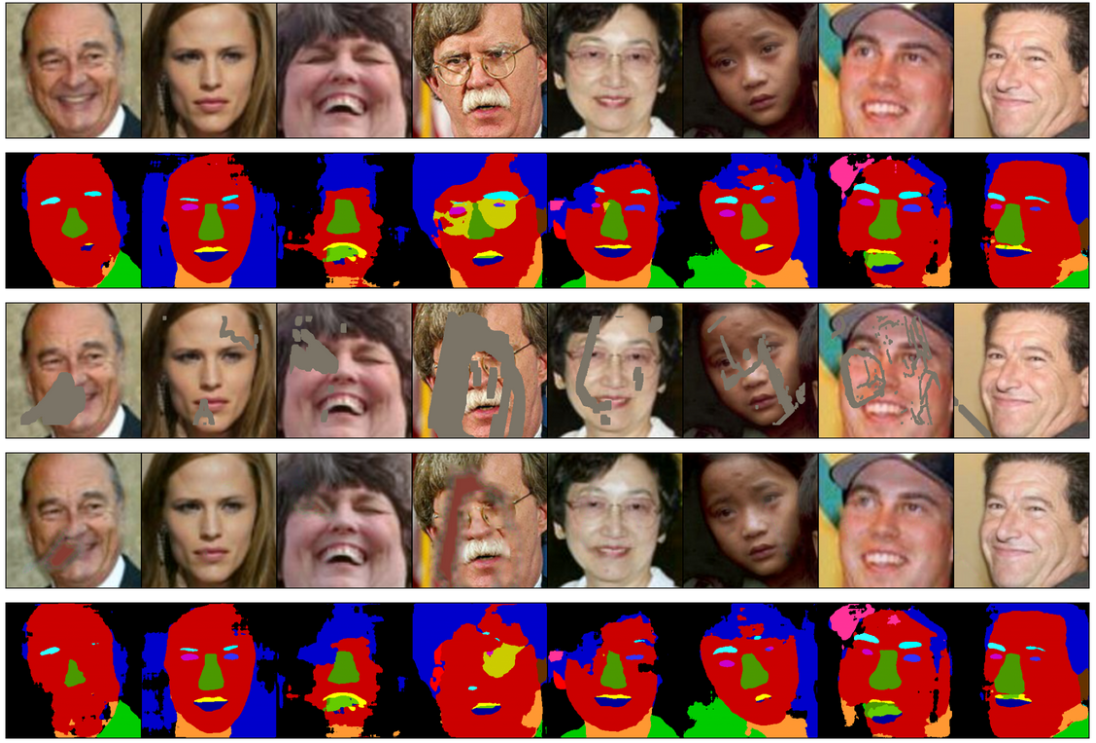

In [8]:
from torch.utils.tensorboard import SummaryWriter
import torch 
import impaintingLib as imp
from torchvision import transforms
from PIL import Image
import PIL

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 1
torch.manual_seed(seed)

plot = imp.utils.Visu(gridSize=8).plot_img
lowresize = 2
highresize = 3

In [9]:
def getModels(basepath):
    models = []
    models.append(imp.model.UNet(3, netType="partial", convType="gated").to(device))
    models.append(imp.model.SubPixelNetwork(3).to(device))
    models[0].load_state_dict(torch.load(basepath + 'UNet(partial gated).pth'))
    models[1].load_state_dict(torch.load(basepath + 'PixelShuffle1.pth'))
    return models

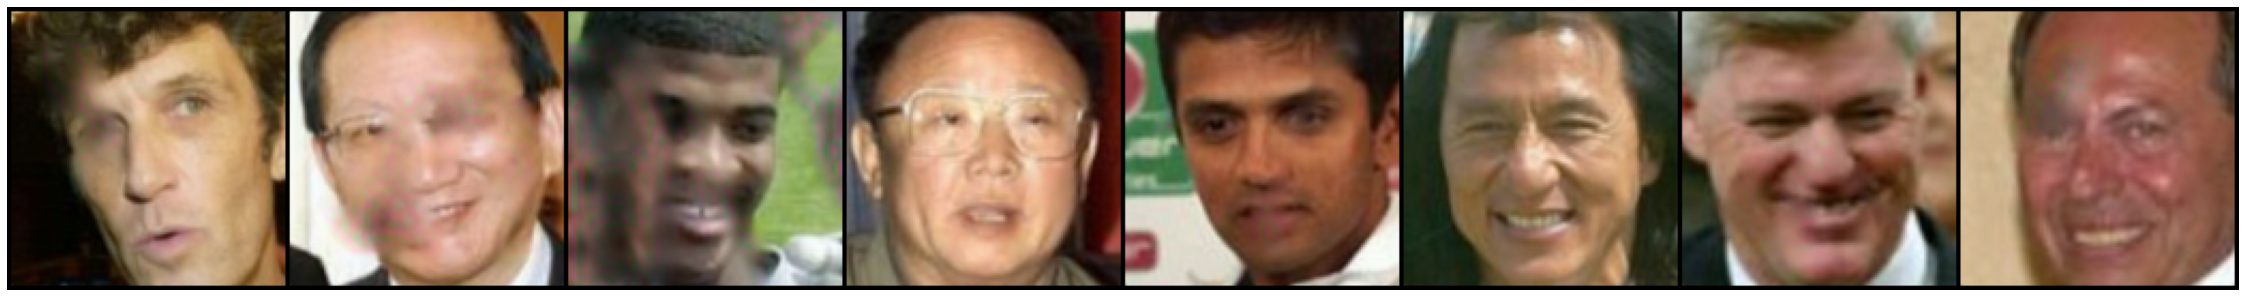

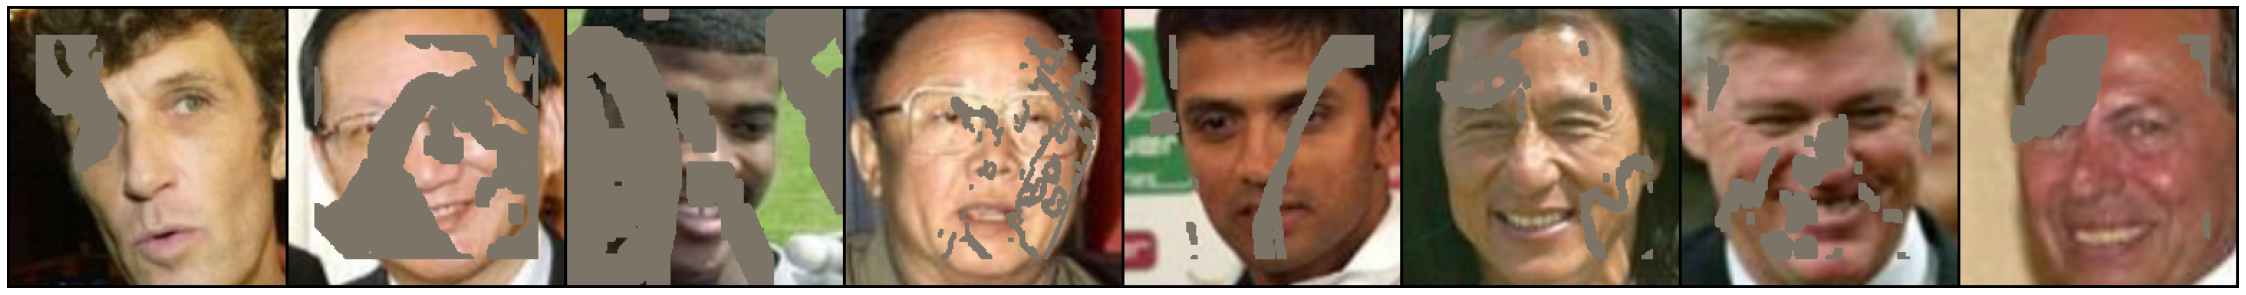

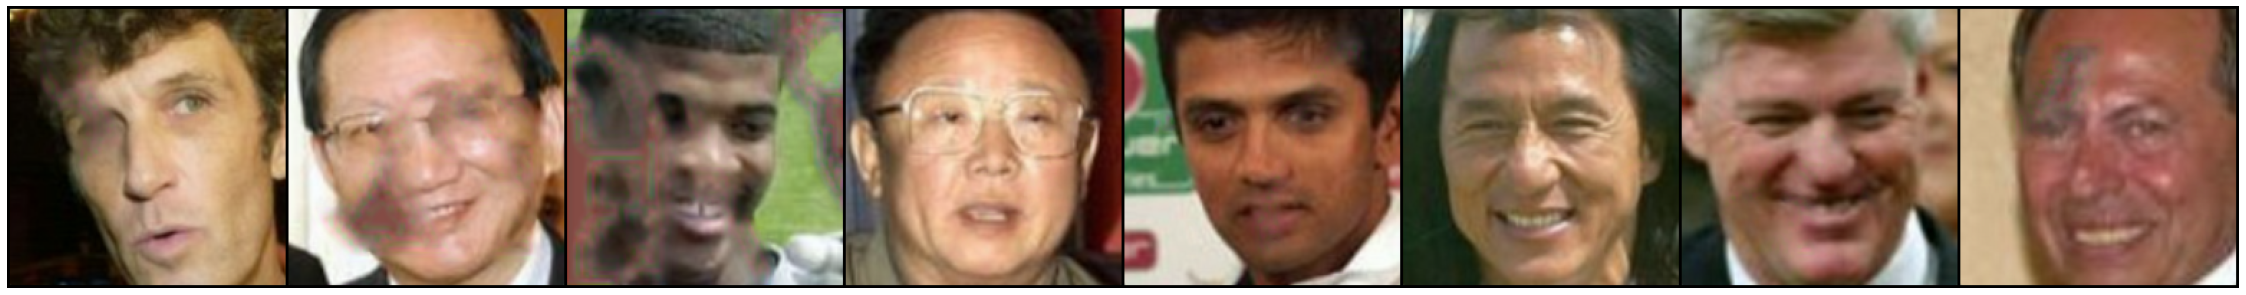

In [10]:
#------- LOW RESOLUTION

# Original
_, testloaderLow = imp.data.getFaces(shuffle=False,resize=lowresize)
imgsLow, _ = next(iter(testloaderLow))
imgsLow = imgsLow.to(device)
#plot(imgsLow)

# Alter
alter = imp.mask.Alter(resize=lowresize,seed=seed).irregularMask
altered = imp.data.normalize(imgsLow)
altered = alter(altered)
alteredDisplay = imp.data.inv_normalize(altered)
#plot(alteredDisplay)

# Predict
models = getModels("./modelSave/gated_conv_UNet(partial_gated)-PixelShuffle1_L1_+_500*perceptualAE_+_perceptualVGG_+_totalvar/")
predicted = altered
for model in models :
    predicted = model(predicted)
predicted = imp.data.inv_normalize(predicted)
plot(predicted)

#------- HIGH RESOLUTION

# Original
_, testloaderHigh = imp.data.getFaces(shuffle=False,resize=highresize)
imgsHigh, _ = next(iter(testloaderHigh))
imgsHigh = imgsHigh.to(device)
#plot(imgsHigh)

# Alter
alter = imp.mask.Alter(resize=highresize,seed=seed).irregularMask
altered = imp.data.normalize(imgsHigh)
altered = alter(altered)
alteredDisplay = imp.data.inv_normalize(altered)
plot(alteredDisplay)

# Predict
models = getModels("./modelSave/gated_conv_UNet(partial_gated)-PixelShuffle1_L1_+_500*perceptualAE_+_perceptualVGG_+_totalvar/")
predicted = altered
for model in models :
    predicted = model(predicted)
predicted = imp.data.inv_normalize(predicted)
plot(predicted)